    -----------------------------------------------------------------------------------------------------------------------
                                               
                                                  ELGHAZI SOUFIANE : 13°
                                                   AMINE MAASRI : 26°
                                                   IBTISSAM LABYADY : 
                                                   
    -----------------------------------------------------------------------------------------------------------------------

# Projet:
    Analyse de données en apprentissage automatique pour résoudre des problèmes de classification et de clustering dans le domaine de la santé .
    -----------------------------------------------------------------------------------------------------------------------

## Introduction:
    Dans ce notebook, on a analyser des données dans le domaine de la santé et plus précisament classification de la santé fœtale en utilisant des techniques d'apprentissage automatique. on a explorer une variété de techniques de classification et de clustering pour résoudre des problèmes spécifiques dans ce domaine et les évaluer afin de conclure et présenter les résultats à interprter.
    -----------------------------------------------------------------------------------------------------------------------

## Dataset :

    le lien de dataset: https://www.kaggle.com/datasets/andrewmvd/fetal-health-classification?select=fetal_health.csv
   ###### Contexte:
    La réduction de la mortalité infantile se reflète dans plusieurs objectifs de développement durable des Nations Unies et est un indicateur clé du progrès humain.
    L'ONU s'attend à ce que d'ici 2030, les pays mettent fin aux décès évitables de nouveau-nés et d'enfants de moins de 5 ans, tous les pays visant à réduire la mortalité des moins de 5 ans à au moins 25 pour 1 000 naissances vivantes.

    Parallèlement à la notion de mortalité infantile, il y a bien sûr la mortalité maternelle, qui représente 295 000 décès pendant et après la grossesse et l'accouchement (en 2017). La grande majorité de ces décès (94 %) sont survenus dans des milieux à faibles ressources, et la plupart auraient pu être évités .

    À la lumière de ce qui a été mentionné ci-dessus, les cardiotocogrammes (CTG) sont une option simple et abordable pour évaluer la santé fœtale, permettant aux professionnels de la santé de prendre des mesures afin de prévenir la mortalité infantile et maternelle. L'équipement lui-même fonctionne en envoyant des impulsions ultrasonores et en lisant sa réponse, faisant ainsi la lumière sur la fréquence cardiaque fœtale (FHR), les mouvements fœtaux, les contractions utérines et plus encore.

   ###### Données:
    Ce jeu de données contient 2126 enregistrements de caractéristiques extraites d'examens de Cardiotocogramme, qui ont ensuite été classés par trois experts obstétriciens en 3 classes :

    @ Normal
    @ Suspect
    @ Pathologique
    -----------------------------------------------------------------------------------------------------------------------

## I.Analyse exploratoire des données :EDA
    Avant de commencer à construire des modèles, on doit effectuer une analyse exploratoire des données pour comprendre les données. on peut utiliser des bibliothèques Python telles que Pandas, Numpy, Seaborn et Matplotlib pour visualiser les données et effectuer des statistiques descriptives.
    -----------------------------------------------------------------------------------------------------------------------


#### 1.Importation des bibliothèques:
    Tout d'abord, on va importer les bibliothèques nécessaires pour l'analyse exploratoire des données et la construction de modèles.
    -----------------------------------------------------------------------------------------------------------------------

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import accuracy_score

#### 2.Téléchargé le jeu de donnée:
    Ensuite, on va lire les données et afficher les cinq premières lignes pour comprendre la structure des données.
    -----------------------------------------------------------------------------------------------------------------------

In [2]:
# Lecture des données
data = pd.read_csv("fetal_health.csv")

# Afficher les 5 premières lignes
data.head()


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


#### 3. Informations sur le jeu de données
     On va voir les informations sur les données, notamment le nombre de colonnes, le nombre d'observations et le type de données de chaque colonne.
    -----------------------------------------------------------------------------------------------------------------------

In [3]:
# Informations et statistiques sur les données
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [4]:
#vérifier les valeurs manquantes.
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [5]:
# Statistiques descriptives
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


#### 4.Distribution des variables :
    Pour comprendre la distribution des valeurs dans chaque colonne, on va afficher l'histogramme de chaque colonne.
    -----------------------------------------------------------------------------------------------------------------------

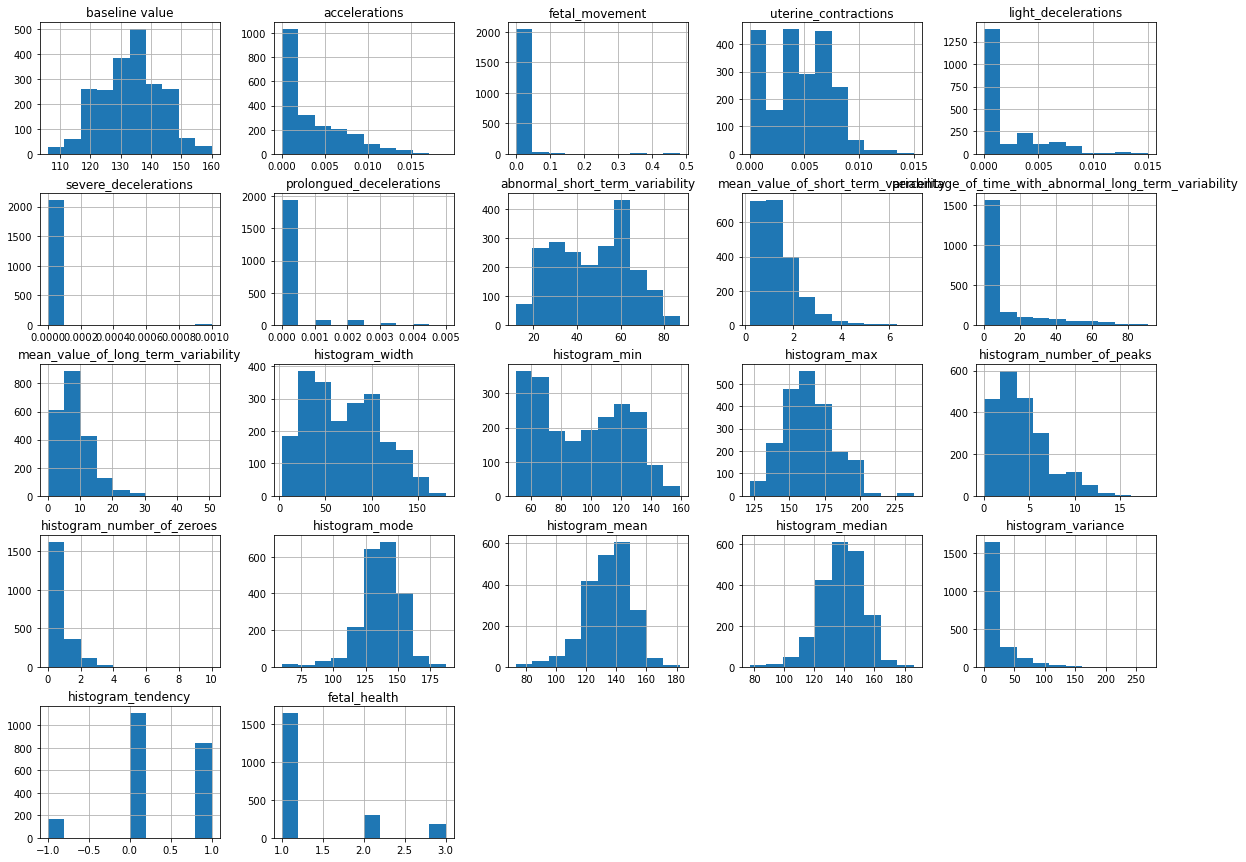

In [6]:
# Histogramme des colonnes
data.hist(figsize=(20, 15))
plt.show()


#### 5.Fréquence des catégories:
    Maintenant on visualise les fréquences de chaque catégorie.

    -----------------------------------------------------------------------------------------------------------------------

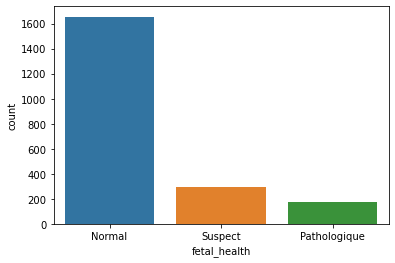

In [7]:
ax=sns.countplot(x='fetal_health', data=data)
ax.set_xticklabels(['Normal', 'Suspect', 'Pathologique'])
plt.show()

#### 5. Features selection:
    On peut faire la selection des features par les corrélations , les tests d'hypothèses ou la fonction SelectKBest().
    -----------------------------------------------------------------------------------------------------------------------

###### 5.1- Corrélations de Pearson:
    On va  calculer la corrélation entre chaque paire de colonnes et afficher la matrice de corrélation sous forme de carte de chaleur

    -----------------------------------------------------------------------------------------------------------------------

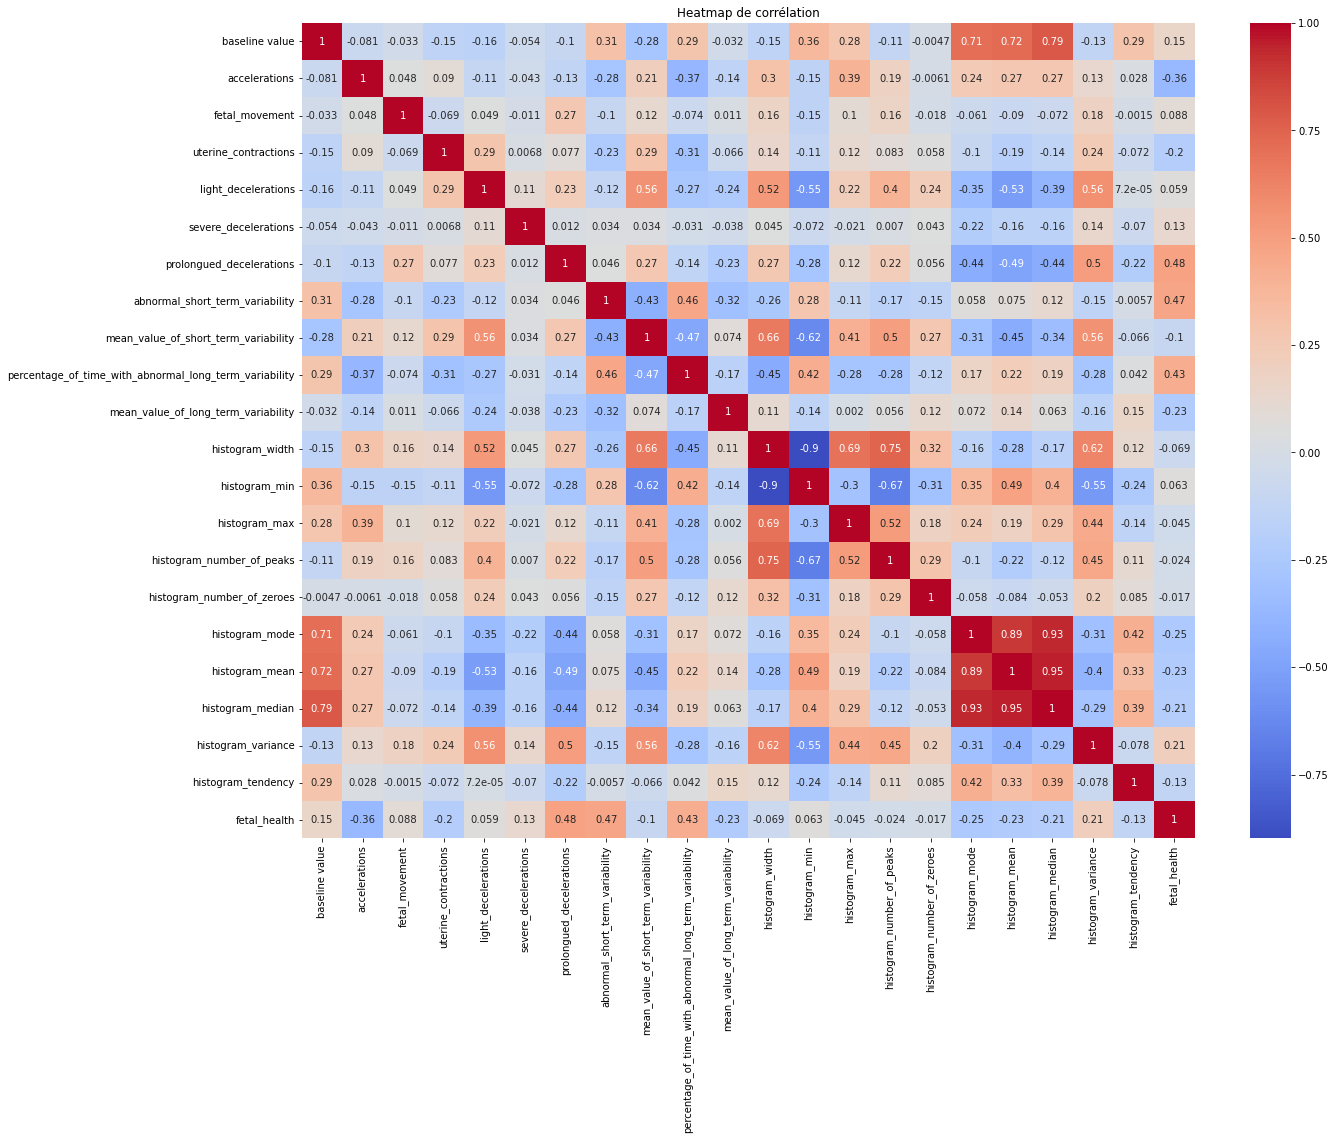

In [8]:
# Matrice de corrélation
corr = data.corr()
# Afficher la carte de chaleur
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Heatmap de corrélation")
plt.show()


###### 5.2- coefficient de Spearman
    Pour analyser la corrélation entre une variable qualitative catégorielle et plusieurs variables quantitatives , on va utiliser le corefficient de Spearman .
    -----------------------------------------------------------------------------------------------------------------------

In [9]:
from scipy.stats import spearmanr
# Calculer la corrélation de Spearman pour chaque variable quantitative
for col in data.columns:
    if col != 'fetal_health':
        corr, pvalue = spearmanr(data[col], data['fetal_health'])
        print(col,":------>","Spearman_Corr:", corr,"_______P-value: ", pvalue)
        print("---------------------------------------------------------------------------------------------------------------")
    

baseline value :------> Spearman_Corr: 0.22130045411478824 _______P-value:  5.368098225933986e-25
---------------------------------------------------------------------------------------------------------------
accelerations :------> Spearman_Corr: -0.4555291981182116 _______P-value:  2.052379513843064e-109
---------------------------------------------------------------------------------------------------------------
fetal_movement :------> Spearman_Corr: 0.11425783802684436 _______P-value:  1.2745082316311505e-07
---------------------------------------------------------------------------------------------------------------
uterine_contractions :------> Spearman_Corr: -0.25605259727581436 _______P-value:  3.558603514644554e-33
---------------------------------------------------------------------------------------------------------------
light_decelerations :------> Spearman_Corr: -0.046203076773097713 _______P-value:  0.03315160556163199
-------------------------------------------------

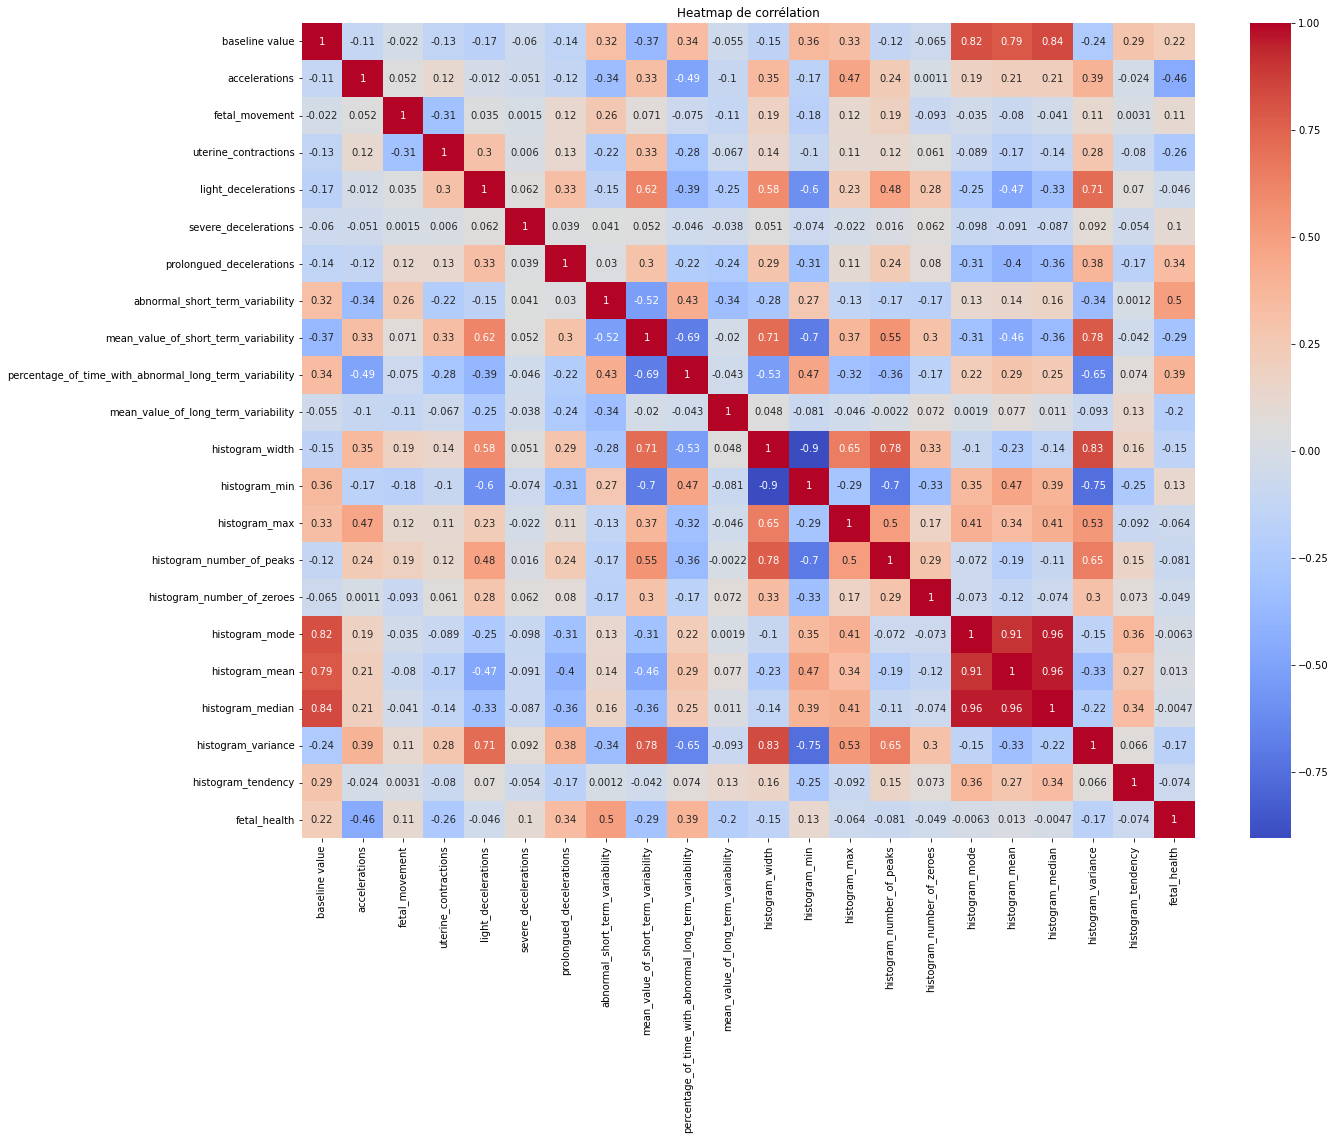

In [10]:
# Matrice de corrélation
corr = data.corr(method = "spearman")
# Afficher la carte de chaleur
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)
ax.set_title("Heatmap de corrélation")
plt.show()

###### 5.3- Test d'hypothèse:
    Dans les tests d'hypothèses statistiques, l'hypothèse nulle représente généralement l'absence d'effet ou de relation entre les variables. Dans ce contexte, l'hypothèse nulle pourrait être :

    Il n'y a pas de relation significative entre les caractéristiques CTG et l'état de santé du fœtus. Plus précisément, nous pourrions formuler l'hypothèse nulle comme suit :

    H0 : Les valeurs moyennes des caractéristiques CTG sont les mêmes pour toutes les classes de santé fœtale, et toute différence observée est due au hasard.

    Pour tester cette hypothèse nulle, nous pourrions effectuer une analyse de variance (ANOVA) ou un autre test statistique approprié pour comparer les moyennes des caractéristiques CTG dans les différentes classes de santé fœtale. Si nous rejetons l'hypothèse nulle, nous conclurions qu'il existe une relation significative entre les caractéristiques CTG et l'état de santé fœtal.
    -----------------------------------------------------------------------------------------------------------------------

In [11]:
from scipy.stats import f_oneway
# Diviser les données en groupes selon la classe de santé fœtale
group1 = data[data['fetal_health'] == 1].iloc[:, 0:21]
group2 = data[data['fetal_health'] == 2].iloc[:, 0:21]
group3 = data[data['fetal_health'] == 3].iloc[:, 0:21]

# Initialiser une liste pour stocker les résultats du test F et les valeurs p pour chaque caractéristique CTG
f_stats = []
p_values = []

# Effectuer une boucle sur chaque caractéristique CTG pour effectuer l'ANOVA à une voie
for col in group1.columns:
    f_statistic, p_value = f_oneway(group1[col], group2[col], group3[col])
    f_stats.append(f_statistic)
    p_values.append(p_value)

# Afficher les résultats pour chaque caractéristique CTG
for i in range(len(f_stats)):
    print("Feature:--------------->", group1.columns[i])
    print("**************")
    print("F-statistic:", f_stats[i])
    print("p-value:", p_values[i])
    print("---------------------------------------------------------------------------------------------------------------")


Feature:---------------> baseline value
**************
F-statistic: 140.62107554190104
p-value: 4.457097803013098e-58
---------------------------------------------------------------------------------------------------------------
Feature:---------------> accelerations
**************
F-statistic: 196.02752285786093
p-value: 7.520612441197657e-79
---------------------------------------------------------------------------------------------------------------
Feature:---------------> fetal_movement
**************
F-statistic: 11.679796736026343
p-value: 9.020532301353381e-06
---------------------------------------------------------------------------------------------------------------
Feature:---------------> uterine_contractions
**************
F-statistic: 93.7157434296913
p-value: 9.935710778472604e-40
---------------------------------------------------------------------------------------------------------------
Feature:---------------> light_decelerations
**************
F-statistic: 66.8

#### 6.Visualiser les variables choisi avec la variable cible:
    Pour visualiser la relation entre chacune de ces caractéristiques CTG et la variable de santé fœtale, on peut utiliser des graphiques tels que des histogrammes ou des diagrammes en boîte.
    -----------------------------------------------------------------------------------------------------------------------

###### 6.1 Histogrammes:

<Figure size 1200x800 with 0 Axes>

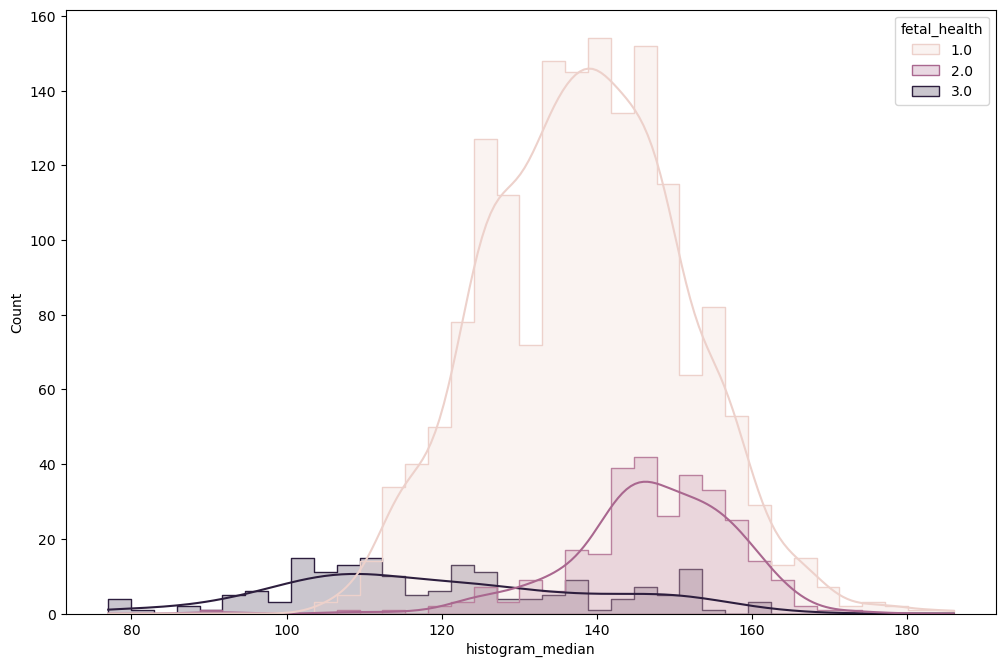

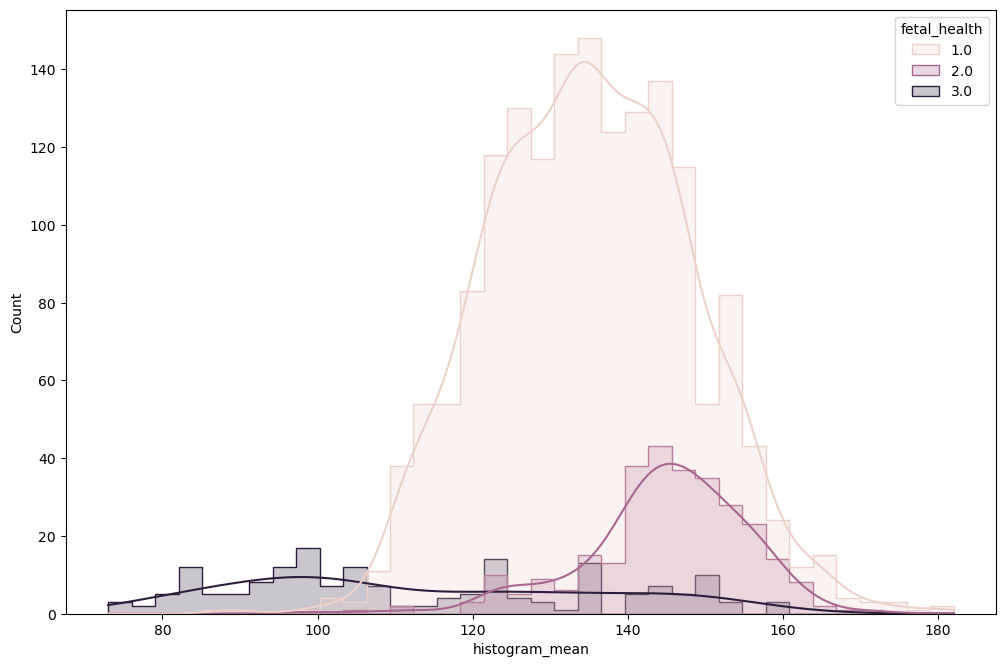

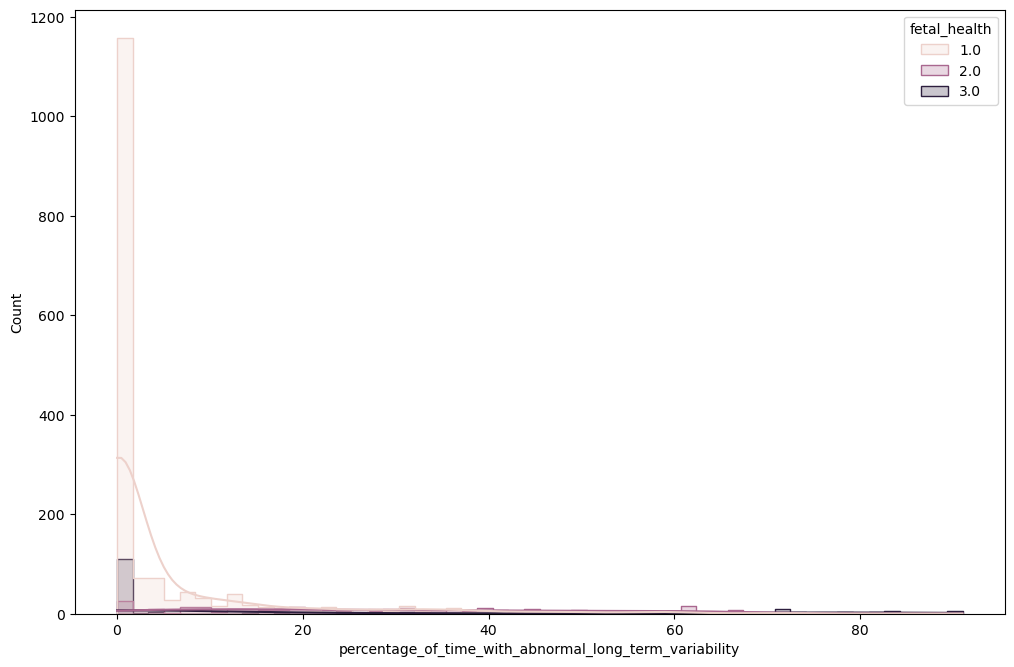

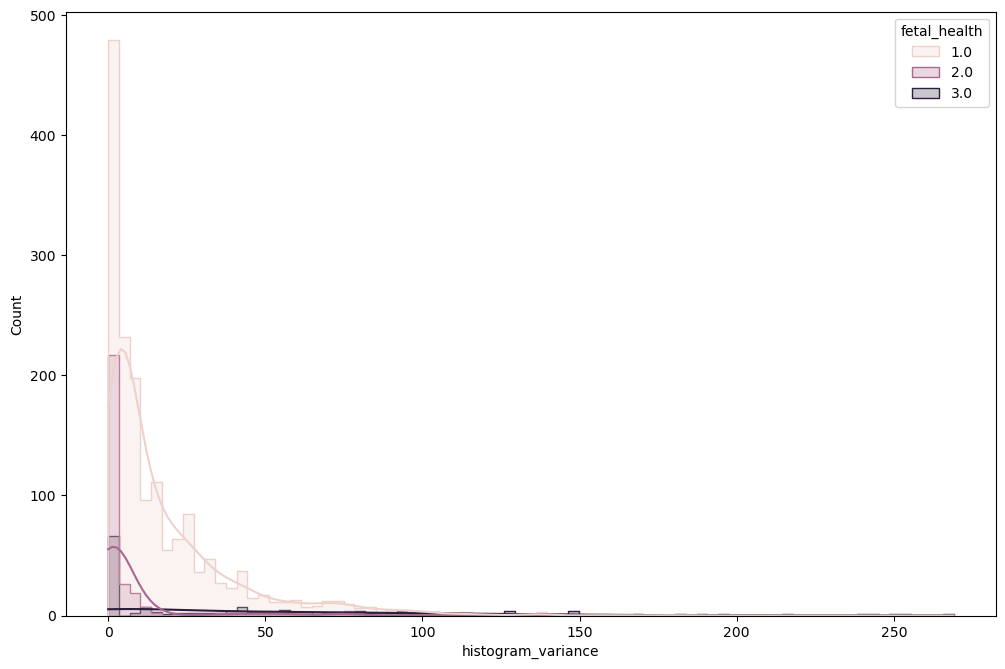

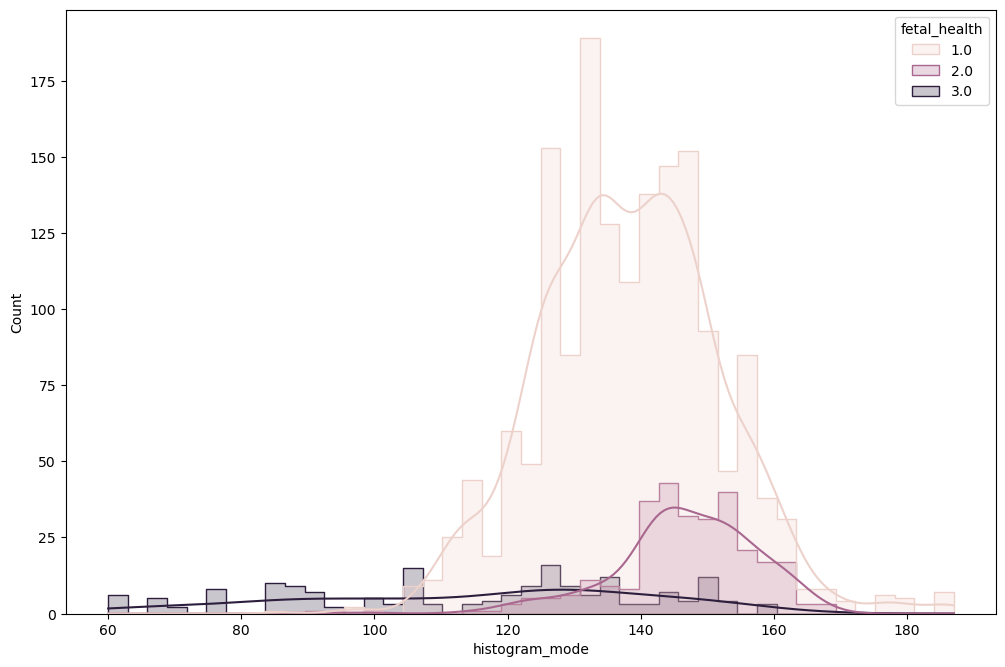

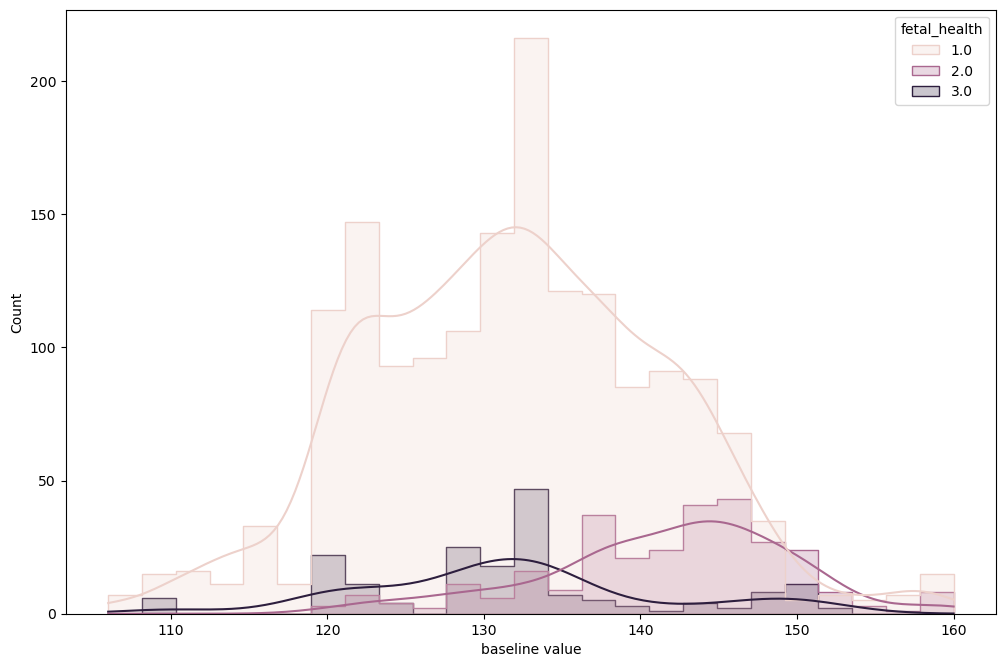

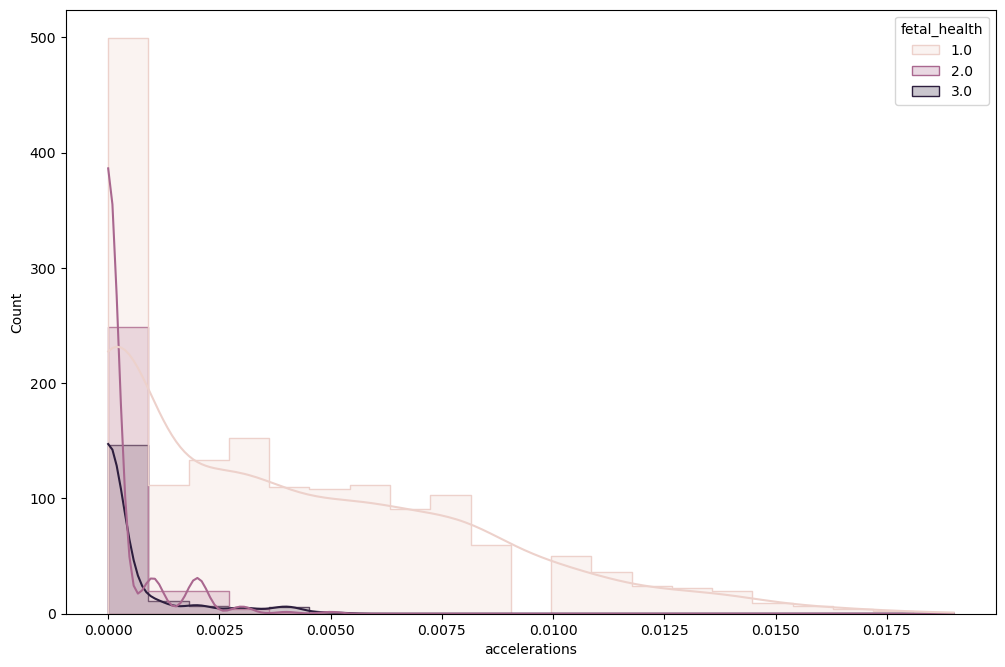

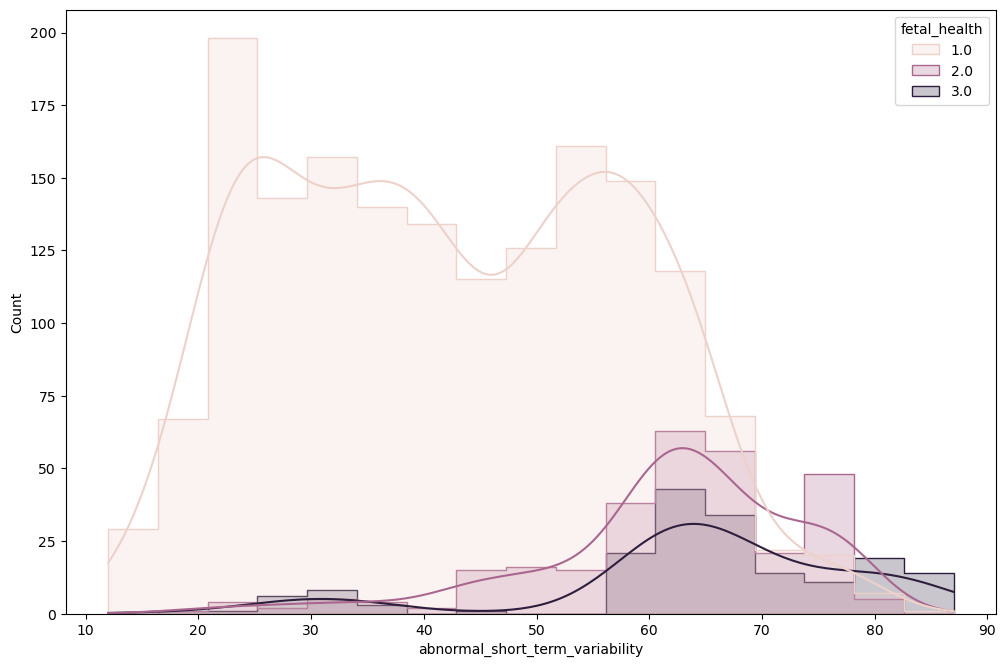

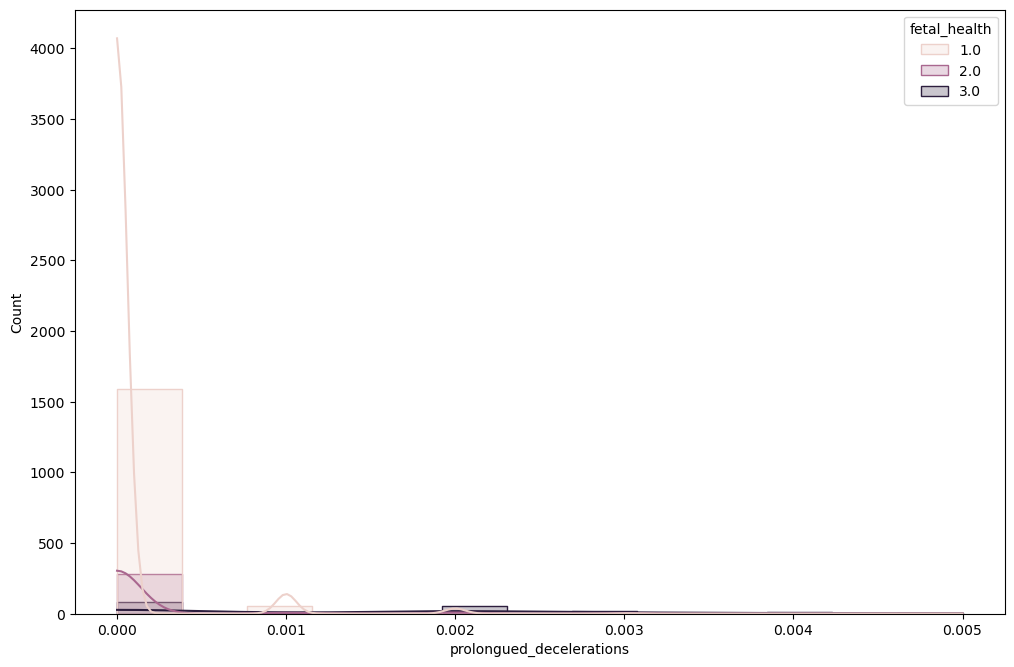

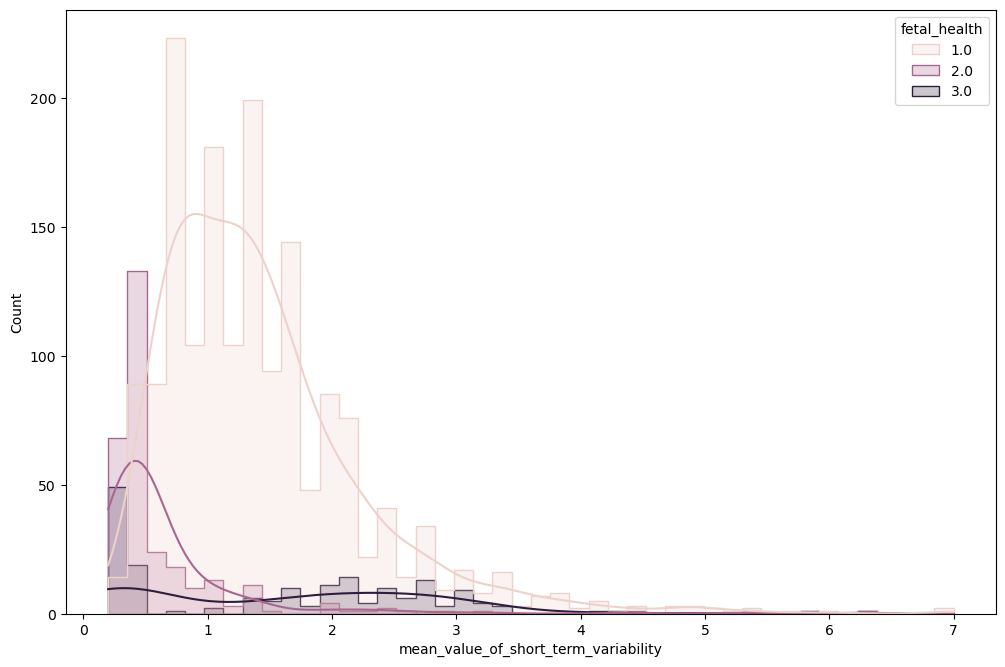

In [12]:
plt.figure(figsize=(12,8), dpi=100)  # Définir la taille de la figure et le dpi
# Tracer un histogramme pour chaque caractéristique CTG en fonction de la variable de santé fœtale
for feature in ['histogram_median', 'histogram_mean', 'percentage_of_time_with_abnormal_long_term_variability', 
                'histogram_variance', 'histogram_mode', 'baseline value', 'accelerations', 
                'abnormal_short_term_variability', 'prolongued_decelerations', 'mean_value_of_short_term_variability']:
    plt.figure(figsize=(12,8), dpi=100)  # Définir la taille de la figure et le dpi
    sns.histplot(data=data, x=feature, hue='fetal_health', element='step', kde=True)
    plt.show()


###### 6.2 diagramme en boîte:

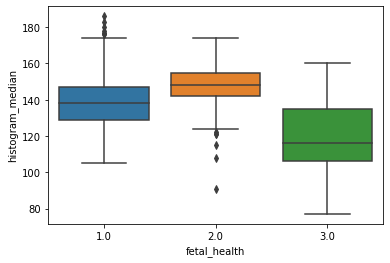

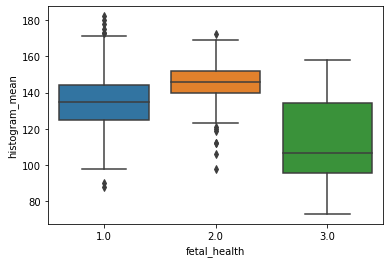

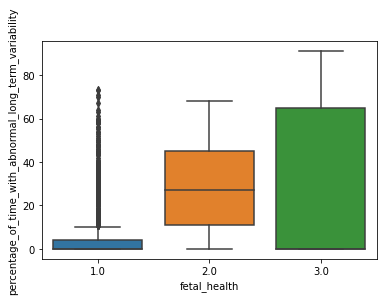

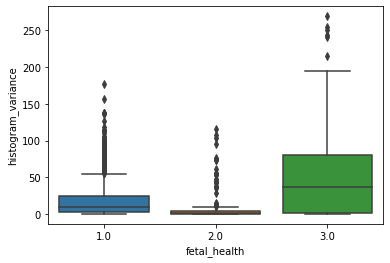

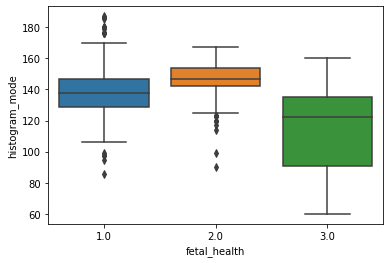

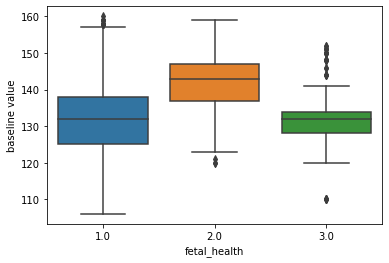

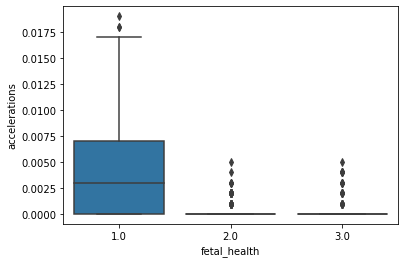

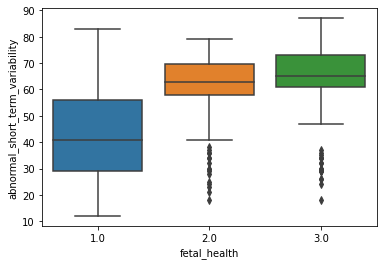

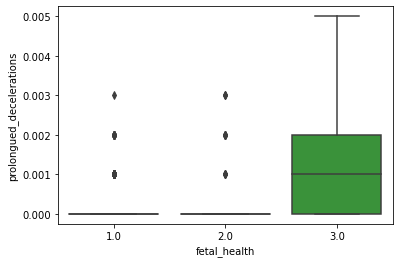

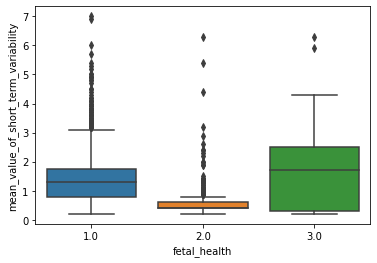

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tracer un diagramme en boîte pour chaque caractéristique CTG en fonction de la variable de santé fœtale
for feature in ['histogram_median', 'histogram_mean', 'percentage_of_time_with_abnormal_long_term_variability', 
                'histogram_variance', 'histogram_mode', 'baseline value', 'accelerations', 
                'abnormal_short_term_variability', 'prolongued_decelerations', 'mean_value_of_short_term_variability']:
    sns.boxplot(data=data, x='fetal_health', y=feature)
    plt.show()


## II.Modèles de classification et de clustering :
    Maintenant on va  utiliser une variété d'algorithmes de classification et de clustering pour résoudre les problèmes dans notre domaine .
    -----------------------------------------------------------------------------------------------------------------------

#### 1.Séparer les variables indépendantes et la variable dépendante
    On va diviser les données en variables d'entrée (X) et variable cible (y) 
    -----------------------------------------------------------------------------------------------------------------------

In [14]:
X =data.loc[: ,['histogram_median', 'histogram_mean', 'percentage_of_time_with_abnormal_long_term_variability', 
                'histogram_variance', 'histogram_mode', 'baseline value', 'accelerations', 
                'abnormal_short_term_variability', 'prolongued_decelerations', 'mean_value_of_short_term_variability']]

Y = data['fetal_health']

#### 2. Division du jeu de données :
    On va diviser les données en ensembles de formation et de test
    -----------------------------------------------------------------------------------------------------------------------

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### 3.  Normaliser les variables numériques
    on va appliquer la normalisation des données aux variables d'entrée
    -----------------------------------------------------------------------------------------------------------------------


In [16]:
scaler = StandardScaler()
X_selected = scaler.fit_transform(X)
X_train_selected = scaler.fit_transform(X_train)
X_test_selected = scaler.transform(X_test)

#### 4. ACP
    On va utiliser l'analyse en composantes principales (PCA) pour réduire la dimensionnalité des données

In [17]:
# Analyse en composantes principales (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_selected)
X_train_pca = pca.fit_transform(X_train_selected)
X_test_pca = pca.transform(X_test_selected)


    Après avoir effectué l'ACP, vous pouvez afficher un graphique de dispersion pour visualiser les données dans les deux premières dimensions principales.

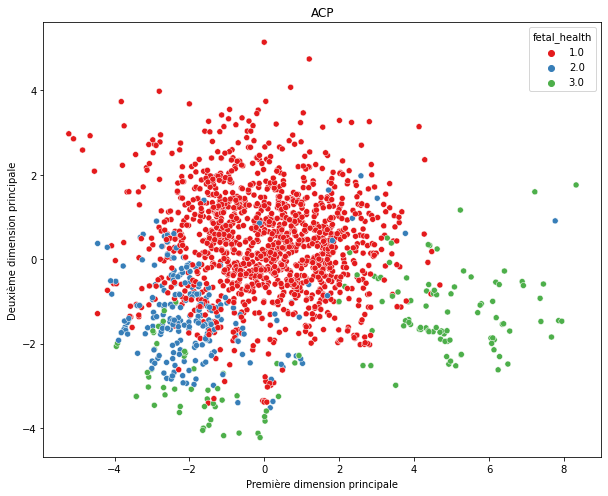

In [18]:
# Afficher le graphique de dispersion pour les deux premières dimensions principales
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=Y_train, palette="Set1")
plt.xlabel("Première dimension principale")
plt.ylabel("Deuxième dimension principale")
plt.title("ACP")
plt.show()


#### 5.Entraîner différents modèles : 
    On va créer différents modèle de machine learning afin de comparer leurs performances aprés ,
    -----------------------------------------------------------------------------------------------------------------------

###### 5.1 Classification:
    On va commencer par les méthodes de ML supérvise de classification 
    -----------------------------------------------------------------------------------------------------------------------

##### 5.1.1 With:
    avec les variables choisit:
    -----------------------------------------------------------------------------------------------------------------------

In [59]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
model_1_with = KNeighborsClassifier(n_neighbors=5)
model_1_with.fit(X_train_selected, Y_train)
Y_predec_model_1_with =model_1_with.predict(X_test_selected)
Y_predec_model_1_with_train =model_1_with.predict(X_train_selected)


In [20]:
# Arbre de décision

from sklearn.tree import DecisionTreeClassifier
model_2_with = DecisionTreeClassifier(random_state=42)
model_2_with.fit(X_train_selected, Y_train)
Y_predec_model_2_with =model_2_with.predict(X_test_selected)
Y_predec_model_2_with_train =model_2_with.predict(X_train_selected)

In [21]:
# Régression logistique

from sklearn.linear_model import LogisticRegression
model_3_with = LogisticRegression(random_state=0)
model_3_with.fit(X_train_selected, Y_train)
Y_predec_model_3_with =model_3_with.predict(X_test_selected)
Y_predec_model_3_with_train =model_3_with.predict(X_train_selected)

In [22]:
# Forêt aléatoire

from sklearn.ensemble import RandomForestClassifier
model_4_with = RandomForestClassifier(n_estimators=100, random_state=0)
model_4_with.fit(X_train_selected, Y_train)
Y_predec_model_4_with =model_4_with.predict(X_test_selected)
Y_predec_model_4_with_train =model_4_with.predict(X_train_selected)

In [23]:
# SVM

from sklearn.svm import LinearSVC
model_5_with = LinearSVC(random_state=0, tol=1e-5)
model_5_with.fit(X_train_selected, Y_train)
Y_predec_model_5_with =model_5_with.predict(X_test_selected)
Y_predec_model_5_with_train =model_5_with.predict(X_train_selected)


C:\Users\elgha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_6_with = GaussianNB()
model_6_with.fit(X_train_selected, Y_train)
Y_predec_model_6_with =model_6_with.predict(X_test_selected)
Y_predec_model_6_with_train =model_6_with.predict(X_train_selected)

##### 5.1.2 Without:
    avec les deux composantes APC
    -------------------------------------------------------------------------------------------------------------------------

In [25]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
model_1_without = KNeighborsClassifier(n_neighbors=5)
model_1_without.fit(X_train_pca, Y_train)
Y_predec_model_1_without =model_1_without.predict(X_test_pca)
Y_predec_model_1_without_train =model_1_without.predict(X_train_pca)

In [26]:
# Arbre de décision

from sklearn.tree import DecisionTreeClassifier
model_2_without = DecisionTreeClassifier(random_state=42)
model_2_without.fit(X_train_pca, Y_train)
Y_predec_model_2_without =model_2_without.predict(X_test_pca)
Y_predec_model_2_without_train =model_2_without.predict(X_train_pca)

In [27]:
# Régression logistique

from sklearn.linear_model import LogisticRegression
model_3_without = LogisticRegression(random_state=0)
model_3_without.fit(X_train_pca, Y_train)
Y_predec_model_3_without =model_3_without.predict(X_test_pca)
Y_predec_model_3_without_train =model_3_without.predict(X_train_pca)

In [28]:
# Forêt aléatoire

from sklearn.ensemble import RandomForestClassifier
model_4_without = RandomForestClassifier(n_estimators=100, random_state=0)
model_4_without.fit(X_train_pca, Y_train)
Y_predec_model_4_without =model_4_without.predict(X_test_pca)
Y_predec_model_4_without_train =model_4_without.predict(X_train_pca)

In [29]:
# SVM

from sklearn.svm import LinearSVC
model_5_without = LinearSVC(random_state=0, tol=1e-5)
model_5_without.fit(X_train_pca, Y_train)
Y_predec_model_5_without =model_5_without.predict(X_test_pca)
Y_predec_model_5_without_train =model_5_without.predict(X_train_pca)

C:\Users\elgha\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [30]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
model_6_without = GaussianNB()
model_6_without.fit(X_train_pca, Y_train)
Y_predec_model_6_without =model_6_without.predict(X_test_pca)
Y_predec_model_6_without_train =model_6_without.predict(X_train_pca)

###### 5.2 Clustring:
    Après, on va passer aux méthodes de ML non supérvise de clustring 
    -----------------------------------------------------------------------------------------------------------------------

    on va appliquer les algorithmes de regroupement k-means, hiérarchique et DBSCAN à notre l'ensemble de données  pour différentes valeurs de k et comparez leurs performances à l'aide de la mesure du score de silhouette. puis on va tracez les scores de silhouette pour chaque valeur de k et identifiez la valeur optimale de k.
    -----------------------------------------------------------------------------------------------------------------------

##### 5.2.1 With:

In [31]:
from sklearn.metrics import silhouette_score
# Définir une plage de valeurs pour k
k_range = range(2, 11)

# Initialiser une liste pour stocker les scores de silhouette pour chaque valeur de k pour les trois algorithmes
kmeans_scores = []
hierarchical_scores = []
dbscan_scores = []

# Appliquer les algorithmes pour différentes valeurs de k et calculer les scores de silhouette correspondants
for k in k_range:
    # k-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_selected)
    kmeans_scores.append(silhouette_score(X_selected, kmeans_labels))

    # hiérarchique
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical_labels = hierarchical.fit_predict(X_selected)
    hierarchical_scores.append(silhouette_score(X_selected, hierarchical_labels))

    # DBSCAN
    dbscan = DBSCAN(eps=0.7, min_samples=4)
    dbscan_labels = dbscan.fit_predict(X_selected)
    dbscan_scores.append(silhouette_score(X_selected, dbscan_labels))

###### K-means clustering:

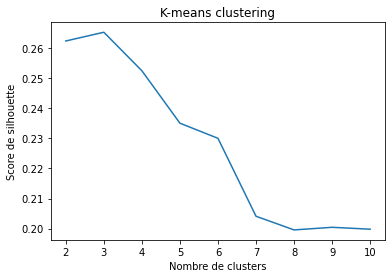

In [32]:
plt.plot(k_range, kmeans_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('K-means clustering')
plt.show()

##### clustering hiérarchique:


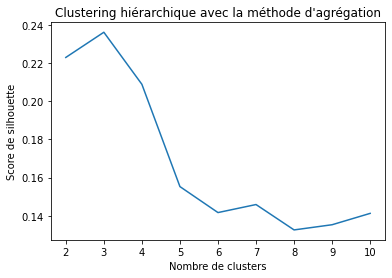

In [33]:
plt.plot(k_range, hierarchical_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Clustering hiérarchique avec la méthode d\'agrégation')
plt.show()

###### DBSCAN:
    

In [34]:
eps_range = np.arange(0.1, 1.1, 0.1)
min_samples_range = range(2, 5)
dbscan_scores = []

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_selected)
        if len(np.unique(dbscan.labels_)) > 1:
            dbscan_scores.append(silhouette_score(X_selected, dbscan.labels_))
        else:
            dbscan_scores.append(-1)


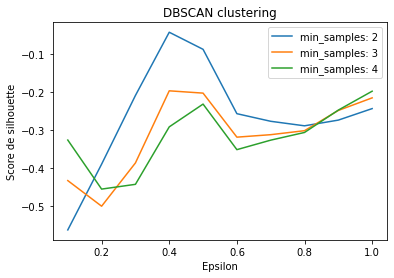

In [35]:
dbscan_scores = np.array(dbscan_scores)
dbscan_scores = dbscan_scores.reshape((len(eps_range), len(min_samples_range)))

for i, min_samples in enumerate(min_samples_range):
    plt.plot(eps_range, dbscan_scores[:,i], label='min_samples: {}'.format(min_samples))

plt.xlabel('Epsilon')
plt.ylabel('Score de silhouette')
plt.title('DBSCAN clustering')
plt.legend()
plt.show()

##### 5.2.2 Without:

In [36]:
from sklearn.metrics import silhouette_score
# Définir une plage de valeurs pour k
k_range = range(2, 11)

# Initialiser une liste pour stocker les scores de silhouette pour chaque valeur de k pour les trois algorithmes
kmeans_scores = []
hierarchical_scores = []
dbscan_scores = []

# Appliquer les algorithmes pour différentes valeurs de k et calculer les scores de silhouette correspondants
for k in k_range:
    # k-means
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_pca)
    kmeans_scores.append(silhouette_score(X_pca, kmeans_labels))

    # hiérarchique
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical_labels = hierarchical.fit_predict(X_pca)
    hierarchical_scores.append(silhouette_score(X_pca, hierarchical_labels))

    # DBSCAN
    dbscan = DBSCAN(eps=0.7, min_samples=4)
    dbscan_labels = dbscan.fit_predict(X_pca)
    dbscan_scores.append(silhouette_score(X_pca, dbscan_labels))

###### K-means clustering:

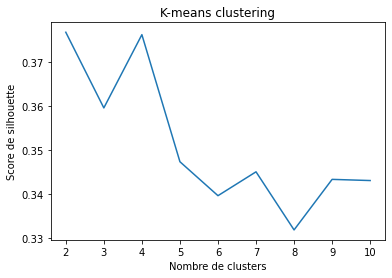

In [37]:
plt.plot(k_range, kmeans_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('K-means clustering')
plt.show()

##### clustering hiérarchique:

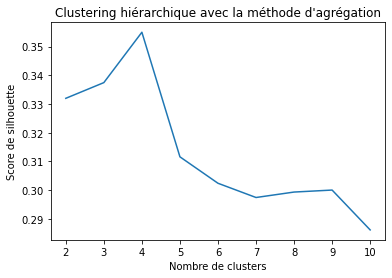

In [38]:
plt.plot(k_range, hierarchical_scores)
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Clustering hiérarchique avec la méthode d\'agrégation')
plt.show()

##### DBSCAN:

In [39]:
eps_range = np.arange(0.1, 1.1, 0.1)
min_samples_range = range(2, 5)
dbscan_scores = []

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X_pca)
        if len(np.unique(dbscan.labels_)) > 1:
            dbscan_scores.append(silhouette_score(X_pca, dbscan.labels_))
        else:
            dbscan_scores.append(-1)

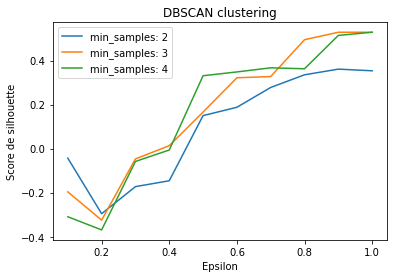

In [40]:
dbscan_scores = np.array(dbscan_scores)
dbscan_scores = dbscan_scores.reshape((len(eps_range), len(min_samples_range)))

for i, min_samples in enumerate(min_samples_range):
    plt.plot(eps_range, dbscan_scores[:,i], label='min_samples: {}'.format(min_samples))

plt.xlabel('Epsilon')
plt.ylabel('Score de silhouette')
plt.title('DBSCAN clustering')
plt.legend()
plt.show()

## III.Évaluation des performances du modèle :
    Après avoir construit des modèles, on va évaluer leurs performances en utilisant des métriques appropriées telles que la précision, le rappel et la F-mesure
    -----------------------------------------------------------------------------------------------------------------------

#### 1.Classification :

##### Mesures de performances:

###### 1.1 With:

In [41]:
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2','class 3']

                        ###########################################
                        ############___KNeighborsClassifier___#####
                        ###########################################
print("______________________________Train______________________________________")              
print("                     ___KNeighborsClassifier___")            
print(classification_report(Y_train, Y_predec_model_1_with_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_1_with_train))
# Calculer l'exactitude du modèle
accuracy_KNN_with = accuracy_score(Y_train, Y_predec_model_1_with_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_KNN_with)
print("______________________________Test______________________________________")              
print("                     ___KNeighborsClassifier___")            
print(classification_report(Y_test, Y_predec_model_1_with, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_1_with))
# Calculer l'exactitude du modèle
accuracy_KNN_with = accuracy_score(Y_test, Y_predec_model_1_with)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_KNN_with)

______________________________Train______________________________________
                     ___KNeighborsClassifier___
              precision    recall  f1-score   support

     class 1       0.97      0.98      0.97      1322
     class 2       0.84      0.81      0.83       231
     class 3       0.92      0.90      0.91       147

    accuracy                           0.95      1700
   macro avg       0.91      0.90      0.90      1700
weighted avg       0.95      0.95      0.95      1700

--------------------------------------------------------------------
[[1289   28    5]
 [  38  187    6]
 [   7    7  133]]
--------------------------------------------------------------------
Accuracy: 0.9464705882352941
______________________________Test______________________________________
                     ___KNeighborsClassifier___
              precision    recall  f1-score   support

     class 1       0.96      0.98      0.97       333
     class 2       0.86      0.80      0.83  

In [42]:
                        ###########################################
                        ############___DecisionTreeClassifier___###
                        ###########################################
print("______________________________Train______________________________________")               
print("                     ___DecisionTreeClassifier___")            
print(classification_report(Y_train, Y_predec_model_2_with_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_2_with_train))
# Calculer l'exactitude du modèle
accuracy_DecisionTree_with = accuracy_score(Y_train, Y_predec_model_2_with_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_DecisionTree_with)
print("______________________________Test______________________________________")   
print("                     ___DecisionTreeClassifier___")            
print(classification_report(Y_test, Y_predec_model_2_with, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_2_with))
# Calculer l'exactitude du modèle
accuracy_DecisionTree_with = accuracy_score(Y_test, Y_predec_model_2_with)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_DecisionTree_with)

______________________________Train______________________________________
                     ___DecisionTreeClassifier___
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00      1322
     class 2       1.00      1.00      1.00       231
     class 3       1.00      1.00      1.00       147

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700

--------------------------------------------------------------------
[[1322    0    0]
 [   0  231    0]
 [   0    0  147]]
--------------------------------------------------------------------
Accuracy: 1.0
______________________________Test______________________________________
                     ___DecisionTreeClassifier___
              precision    recall  f1-score   support

     class 1       0.95      0.95      0.95       333
     class 2       0.78      0.73      0.76        64
  

In [43]:
                        ###########################################
                        ############___LogisticRegression___#######
                        ###########################################
        
print("______________________________Train______________________________________")               
print("                     ___LogisticRegression___")            
print(classification_report(Y_train, Y_predec_model_3_with_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_3_with_train))
# Calculer l'exactitude du modèle
accuracy_LogisticRegression_with = accuracy_score(Y_train, Y_predec_model_3_with_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_LogisticRegression_with)
print("______________________________test______________________________________") 
print("                     ___LogisticRegression___")            
print(classification_report(Y_test, Y_predec_model_3_with, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_3_with))
# Calculer l'exactitude du modèle
accuracy_LogisticRegression_with = accuracy_score(Y_test, Y_predec_model_3_with)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_LogisticRegression_with)

______________________________Train______________________________________
                     ___LogisticRegression___
              precision    recall  f1-score   support

     class 1       0.94      0.95      0.94      1322
     class 2       0.65      0.59      0.62       231
     class 3       0.80      0.78      0.79       147

    accuracy                           0.89      1700
   macro avg       0.79      0.77      0.78      1700
weighted avg       0.88      0.89      0.89      1700

--------------------------------------------------------------------
[[1259   50   13]
 [  78  137   16]
 [   9   24  114]]
--------------------------------------------------------------------
Accuracy: 0.888235294117647
______________________________test______________________________________
                     ___LogisticRegression___
              precision    recall  f1-score   support

     class 1       0.93      0.94      0.94       333
     class 2       0.67      0.66      0.66       

In [44]:
                        ###########################################
                        ############___RandomForestClassifier___###
                        ###########################################

print("______________________________Train______________________________________")               
print("                     ___RandomForestClassifier___")            
print(classification_report(Y_train, Y_predec_model_4_with_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_4_with_train))
# Calculer l'exactitude du modèle
accuracy_RandomForest_with = accuracy_score(Y_train, Y_predec_model_4_with_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_RandomForest_with)
print("______________________________test______________________________________")             
print("                     ___RandomForestClassifier___")            
print(classification_report(Y_test, Y_predec_model_4_with, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_4_with))
# Calculer l'exactitude du modèle
accuracy_RandomForest_with = accuracy_score(Y_test, Y_predec_model_4_with)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_RandomForest_with)

______________________________Train______________________________________
                     ___RandomForestClassifier___
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00      1322
     class 2       1.00      1.00      1.00       231
     class 3       1.00      1.00      1.00       147

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700

--------------------------------------------------------------------
[[1322    0    0]
 [   0  231    0]
 [   0    0  147]]
--------------------------------------------------------------------
Accuracy: 1.0
______________________________test______________________________________
                     ___RandomForestClassifier___
              precision    recall  f1-score   support

     class 1       0.97      0.98      0.97       333
     class 2       0.91      0.83      0.87        64
  

In [45]:
                        ###########################################
                        ####___Support Vector Machine (SVM) ___####
                        ###########################################

print("______________________________Train______________________________________")               
print("                      ___Support Vector Machine (SVM)___")            
print(classification_report(Y_train, Y_predec_model_5_with_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_5_with_train))
# Calculer l'exactitude du modèle
accuracy_SVM_with = accuracy_score(Y_train, Y_predec_model_5_with_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_SVM_with)
print("______________________________Test______________________________________")               
print("               ___Support Vector Machine (SVM)___")            
print(classification_report(Y_test, Y_predec_model_5_with, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_5_with))
# Calculer l'exactitude du modèle
accuracy_SVM_with = accuracy_score(Y_test, Y_predec_model_5_with)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_SVM_with)

______________________________Train______________________________________
                      ___Support Vector Machine (SVM)___
              precision    recall  f1-score   support

     class 1       0.93      0.95      0.94      1322
     class 2       0.64      0.57      0.60       231
     class 3       0.82      0.77      0.79       147

    accuracy                           0.89      1700
   macro avg       0.80      0.76      0.78      1700
weighted avg       0.88      0.89      0.88      1700

--------------------------------------------------------------------
[[1261   50   11]
 [  85  132   14]
 [  10   24  113]]
--------------------------------------------------------------------
Accuracy: 0.8858823529411765
______________________________Test______________________________________
               ___Support Vector Machine (SVM)___
              precision    recall  f1-score   support

     class 1       0.93      0.95      0.94       333
     class 2       0.68      0.61 

In [46]:
                        ###########################################
                        ##########_______naive bayes _______#######
                        ###########################################

print("______________________________Train______________________________________")               
print("                      ______Naives Bayes______")            
print(classification_report(Y_train, Y_predec_model_6_with_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_6_with_train))
# Calculer l'exactitude du modèle
accuracy_naive_Bayes_with = accuracy_score(Y_train, Y_predec_model_6_with_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_naive_Bayes_with)
print("______________________________Test______________________________________")               
print("               ______Naives Bayes______")            
print(classification_report(Y_test, Y_predec_model_6_with, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_6_with))
# Calculer l'exactitude du modèle
accuracy_naive_Bayes_with = accuracy_score(Y_test, Y_predec_model_6_with)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_naive_Bayes_with)

______________________________Train______________________________________
                      ______Naives Bayes______
              precision    recall  f1-score   support

     class 1       0.97      0.87      0.92      1322
     class 2       0.53      0.84      0.65       231
     class 3       0.65      0.68      0.66       147

    accuracy                           0.85      1700
   macro avg       0.72      0.79      0.74      1700
weighted avg       0.89      0.85      0.86      1700

--------------------------------------------------------------------
[[1148  132   42]
 [  25  193   13]
 [   5   42  100]]
--------------------------------------------------------------------
Accuracy: 0.8476470588235294
______________________________Test______________________________________
               ______Naives Bayes______
              precision    recall  f1-score   support

     class 1       0.97      0.83      0.89       333
     class 2       0.50      0.80      0.61        64


###### 1.2 Without:

In [47]:
                        ###########################################
                        ############___KNeighborsClassifier___#####
                        ###########################################

print("______________________________Train______________________________________")              
print("                     ___KNeighborsClassifier___")            
print(classification_report(Y_train, Y_predec_model_1_without_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_1_without_train))
# Calculer l'exactitude du modèle
accuracy_KNN_without = accuracy_score(Y_train, Y_predec_model_1_without_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_KNN_without)
print("______________________________Test______________________________________")              
print("                     ___KNeighborsClassifier___")            
print(classification_report(Y_test, Y_predec_model_1_without, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_1_without))
# Calculer l'exactitude du modèle
accuracy_KNN_without = accuracy_score(Y_test, Y_predec_model_1_without)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_KNN_without)

______________________________Train______________________________________
                     ___KNeighborsClassifier___
              precision    recall  f1-score   support

     class 1       0.93      0.96      0.94      1322
     class 2       0.73      0.62      0.67       231
     class 3       0.88      0.78      0.83       147

    accuracy                           0.90      1700
   macro avg       0.84      0.79      0.81      1700
weighted avg       0.90      0.90      0.90      1700

--------------------------------------------------------------------
[[1270   42   10]
 [  81  144    6]
 [  20   12  115]]
--------------------------------------------------------------------
Accuracy: 0.8994117647058824
______________________________Test______________________________________
                     ___KNeighborsClassifier___
              precision    recall  f1-score   support

     class 1       0.91      0.97      0.94       333
     class 2       0.77      0.52      0.62  

In [48]:
                        ###########################################
                        ############___DecisionTreeClassifier___###
                        ###########################################

print("______________________________Train______________________________________")              
print("                     ___DecisionTreeClassifier___")            
print(classification_report(Y_train, Y_predec_model_2_without_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_2_without_train))
# Calculer l'exactitude du modèle
accuracy_DecisionTree_without = accuracy_score(Y_train, Y_predec_model_2_without_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_DecisionTree_without)
print("______________________________Test______________________________________")               
print("                     ___DecisionTreeClassifier___")            
print(classification_report(Y_test, Y_predec_model_2_without, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_2_without))
# Calculer l'exactitude du modèle
accuracy_DecisionTree_without = accuracy_score(Y_test, Y_predec_model_2_without)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_DecisionTree_without)

______________________________Train______________________________________
                     ___DecisionTreeClassifier___
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00      1322
     class 2       1.00      1.00      1.00       231
     class 3       1.00      1.00      1.00       147

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700

--------------------------------------------------------------------
[[1322    0    0]
 [   0  231    0]
 [   0    0  147]]
--------------------------------------------------------------------
Accuracy: 1.0
______________________________Test______________________________________
                     ___DecisionTreeClassifier___
              precision    recall  f1-score   support

     class 1       0.92      0.92      0.92       333
     class 2       0.61      0.56      0.59        64
  

In [49]:
                        ###########################################
                        ############___LogisticRegression___#######
                        ###########################################

print("______________________________Train______________________________________")              
print("                     ___LogisticRegression___")            
print(classification_report(Y_train, Y_predec_model_3_without_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_3_without_train))
# Calculer l'exactitude du modèle
accuracy_LogisticRegression_without = accuracy_score(Y_train, Y_predec_model_3_without_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_LogisticRegression_without)
print("______________________________Test______________________________________")             
print("                     ___LogisticRegression___")            
print(classification_report(Y_test, Y_predec_model_3_without, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_3_without))
# Calculer l'exactitude du modèle
accuracy_LogisticRegression_without = accuracy_score(Y_test, Y_predec_model_3_without)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_LogisticRegression_without)

______________________________Train______________________________________
                     ___LogisticRegression___
              precision    recall  f1-score   support

     class 1       0.89      0.96      0.92      1322
     class 2       0.62      0.42      0.50       231
     class 3       0.66      0.53      0.59       147

    accuracy                           0.85      1700
   macro avg       0.72      0.64      0.67      1700
weighted avg       0.83      0.85      0.84      1700

--------------------------------------------------------------------
[[1265   26   31]
 [ 123   98   10]
 [  35   34   78]]
--------------------------------------------------------------------
Accuracy: 0.8476470588235294
______________________________Test______________________________________
                     ___LogisticRegression___
              precision    recall  f1-score   support

     class 1       0.90      0.96      0.93       333
     class 2       0.69      0.45      0.55      

In [50]:
                       ###########################################
                       ############___RandomForestClassifier___###
                       ###########################################

print("______________________________Train______________________________________")              
print("                     ___RandomForestClassifier___")            
print(classification_report(Y_train, Y_predec_model_4_without_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_4_without_train))
# Calculer l'exactitude du modèle
accuracy_RandomForest_without = accuracy_score(Y_train, Y_predec_model_4_without_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_RandomForest_without)
print("______________________________Test______________________________________")               
print("                     ___RandomForestClassifier___")            
print(classification_report(Y_test, Y_predec_model_4_without, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_4_without))
# Calculer l'exactitude du modèle
accuracy_RandomForest_without = accuracy_score(Y_test, Y_predec_model_4_without)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_RandomForest_without)

______________________________Train______________________________________
                     ___RandomForestClassifier___
              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00      1322
     class 2       1.00      1.00      1.00       231
     class 3       1.00      0.99      1.00       147

    accuracy                           1.00      1700
   macro avg       1.00      1.00      1.00      1700
weighted avg       1.00      1.00      1.00      1700

--------------------------------------------------------------------
[[1322    0    0]
 [   0  231    0]
 [   1    0  146]]
--------------------------------------------------------------------
Accuracy: 0.9994117647058823
______________________________Test______________________________________
                     ___RandomForestClassifier___
              precision    recall  f1-score   support

     class 1       0.93      0.96      0.94       333
     class 2       0.75      0.59      0.

In [51]:
                        ###########################################
                        ####___Support Vector Machine (SVM) ___####
                        ###########################################

print("______________________________Train______________________________________")              
print("                     ___Support Vector Machine (SVM)___")            
print(classification_report(Y_train, Y_predec_model_5_without_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_5_without_train))
# Calculer l'exactitude du modèle
accuracy_SVM_without = accuracy_score(Y_train, Y_predec_model_5_without_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_SVM_without)
print("______________________________Test______________________________________")              
print("               ___Support Vector Machine (SVM)___")            
print(classification_report(Y_test, Y_predec_model_5_without, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_5_without))
# Calculer l'exactitude du modèle
accuracy_SVM_without = accuracy_score(Y_test, Y_predec_model_5_without)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_SVM_without)

______________________________Train______________________________________
                     ___Support Vector Machine (SVM)___
              precision    recall  f1-score   support

     class 1       0.87      0.97      0.91      1322
     class 2       0.58      0.29      0.39       231
     class 3       0.63      0.46      0.53       147

    accuracy                           0.83      1700
   macro avg       0.69      0.57      0.61      1700
weighted avg       0.81      0.83      0.81      1700

--------------------------------------------------------------------
[[1279   13   30]
 [ 153   68   10]
 [  43   37   67]]
--------------------------------------------------------------------
Accuracy: 0.831764705882353
______________________________Test______________________________________
               ___Support Vector Machine (SVM)___
              precision    recall  f1-score   support

     class 1       0.88      0.97      0.92       333
     class 2       0.71      0.39   

In [52]:
                        ###########################################
                        ##########_______naive bayes _______#######
                        ###########################################

print("______________________________Train______________________________________")              
print("                      ______Naives Bayes______")            
print(classification_report(Y_train, Y_predec_model_6_without_train, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_train, Y_predec_model_6_without_train))
# Calculer l'exactitude du modèle
accuracy_naive_Bayes_without = accuracy_score(Y_train, Y_predec_model_6_without_train)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_naive_Bayes_without)
print("______________________________Test______________________________________")              
print("               ______Naives Bayes______")            
print(classification_report(Y_test, Y_predec_model_6_without, target_names=target_names))
print("--------------------------------------------------------------------")
print(confusion_matrix(Y_test, Y_predec_model_6_without))
# Calculer l'exactitude du modèle
accuracy_naive_Bayes_without = accuracy_score(Y_test, Y_predec_model_6_without)
print("--------------------------------------------------------------------")
print("Accuracy:", accuracy_naive_Bayes_without)

______________________________Train______________________________________
                      ______Naives Bayes______
              precision    recall  f1-score   support

     class 1       0.91      0.95      0.93      1322
     class 2       0.59      0.55      0.57       231
     class 3       0.79      0.56      0.65       147

    accuracy                           0.86      1700
   macro avg       0.76      0.68      0.72      1700
weighted avg       0.86      0.86      0.86      1700

--------------------------------------------------------------------
[[1258   45   19]
 [ 102  126    3]
 [  24   41   82]]
--------------------------------------------------------------------
Accuracy: 0.8623529411764705
______________________________Test______________________________________
               ______Naives Bayes______
              precision    recall  f1-score   support

     class 1       0.93      0.96      0.95       333
     class 2       0.67      0.67      0.67        64


##### 2.Visualisation des classes générées par les algorithmes de classifications. 

##### 2.1 With:

NameError: name 'model_1_without_labels' is not defined

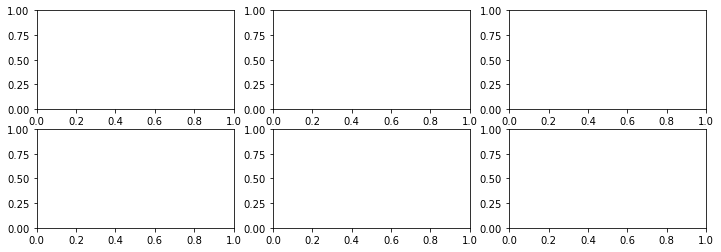

In [57]:
fig, axes = plt.subplots(2, 3, figsize=(12, 4))
color = ["red","blue","green"]
# Tracé pour le modèle KNN
axes[0, 0].scatter(X_selected[:, 0], X_selected[:, 1], c=color, s=50)
axes[0, 0].set_title("KNN")

# Tracé pour le modèle DecisionTree
axes[0, 1].scatter(X_selected[:, 0], X_selected[:, 1], c=color, s=50)
axes[0, 1].set_title("DecisionTree")

# Tracé pour le modèle SVM
axes[0, 2].scatter(X_selected[:, 0], X_selected[:, 1], c=color, s=50)
axes[0, 2].set_title("SVM")

# Tracé pour le modèle LogisticRegression
axes[1, 0].scatter(X_selected[:, 0], X_selected[:, 1], c=color, s=50)
axes[1, 0].set_title("LogisticRegression")

# Tracé pour le modèle RandomForest
axes[1, 1].scatter(X_selected[:, 0], X_selected[:, 1], c=color, s=50)
axes[1, 1].set_title("RandomForest")

# Tracé pour le modèle GradientBoosting
axes[1, 2].scatter(X_selected[:, 0], X_selected[:, 1], c=color, s=50)
axes[1, 2].set_title("Naive Bayes")

plt.show()



##### 2.2 Without:

#### 2.Clustring :

##### 1.Mesures des performances:

###### 1.1 with:

In [62]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_selected)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_selected)

dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_selected)

###### Rand Index (RI):

In [63]:
from sklearn.metrics import adjusted_rand_score

In [64]:
#Kmeans clustring

RI_KNN = adjusted_rand_score(Y, kmeans_labels)
print("Rand Index (RI) ----------> :", RI_KNN)

Rand Index (RI) ----------> : 0.17591083253514217


In [65]:
#clustering hiérarchique:

RI_aglomorative = adjusted_rand_score(Y, hierarchical_labels)
print("Rand Index (RI) ----------> :", RI_aglomorative)

Rand Index (RI) ----------> : 0.25066848773337397


In [66]:
#DBSCAN

RI_DBSCAN = adjusted_rand_score(Y, dbscan_labels)
print("Rand Index (RI) ----------> :", RI_DBSCAN)

Rand Index (RI) ----------> : 0.018038930334828295


###### adjusted_mutual_info (MI):

In [67]:
from sklearn.metrics import adjusted_mutual_info_score

In [68]:
#Kmeans clustring
MI_KNN = adjusted_mutual_info_score(Y, kmeans_labels)
print("Mutual Information (MI) :", MI_KNN)

Mutual Information (MI) : 0.24793637774124122


In [69]:
#clustering hiérarchique:
MI_aglomorative = adjusted_mutual_info_score(Y, hierarchical_labels)
print("Mutual Information (MI) :", MI_aglomorative)

Mutual Information (MI) : 0.2310849797915781


In [70]:
#DBSCAN
MI_DBSCAN = adjusted_mutual_info_score(Y, dbscan_labels)
print("Mutual Information (MI) :", MI_DBSCAN)

Mutual Information (MI) : 0.11773480606703726


###### Indice de Davies-Bouldin:

In [71]:
from sklearn.metrics import davies_bouldin_score


In [72]:
#Kmeans clustring
IDB_KNN = davies_bouldin_score(X_selected, kmeans.labels_)
print("Indice de Davies-Bouldin (IDB) :", IDB_KNN)

Indice de Davies-Bouldin (IDB) : 1.3321225995445911


In [73]:
#clustering hiérarchique:
IDB_aglomorative = davies_bouldin_score(X_selected, hierarchical.labels_)
print("Indice de Davies-Bouldin (IDB) :", IDB_aglomorative)

Indice de Davies-Bouldin (IDB) : 1.4185972758206342


In [74]:
#DBSCAN
IDB_DBSCAN = davies_bouldin_score(X_selected, dbscan.labels_)
print("Indice de Davies-Bouldin (IDB) :", IDB_DBSCAN)

Indice de Davies-Bouldin (IDB) : 1.5042993671442535


###### Indice de Calinski-Harabasz:

In [75]:
from sklearn.metrics import calinski_harabasz_score

In [76]:
#Kmeans clustring
chi_KNN = calinski_harabasz_score(X_selected, kmeans.labels_)
print("Indice de Calinski-Harabasz :", chi_KNN)

Indice de Calinski-Harabasz : 732.2476042503399


In [77]:
#clustering hiérarchique:
chi_aglomorative = calinski_harabasz_score(X_selected, hierarchical.labels_)
print("Indice de Calinski-Harabasz :", chi_aglomorative)

Indice de Calinski-Harabasz : 627.9435500902218


In [78]:
#DBSCAN
chi_DBSCAN = calinski_harabasz_score(X_selected, dbscan.labels_)
print("Indice de Calinski-Harabasz :", chi_DBSCAN)

Indice de Calinski-Harabasz : 14.446780980242481


###### 1.2 without:

In [79]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)
kmeans_labels_pca = kmeans.fit_predict(X_pca)

hierarchical_pca = AgglomerativeClustering(n_clusters=3)
hierarchical_labels_pca = hierarchical.fit_predict(X_pca)

dbscan_pca = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels_pca = dbscan.fit_predict(X_pca)

###### Rand Index (RI):

In [80]:
#Kmeans clustring

RI_KNN_without = adjusted_rand_score(Y, kmeans_labels_pca)
print("Rand Index (RI) ----------> :", RI_KNN_without)

Rand Index (RI) ----------> : 0.18264537864605787


In [81]:
#clustering hiérarchique:

RI_aglomorative_without = adjusted_rand_score(Y, hierarchical_labels_pca)
print("Rand Index (RI) ----------> :", RI_aglomorative_without)

Rand Index (RI) ----------> : 0.19966141636845536


In [82]:
#DBSCAN

RI_DBSCAN_without = adjusted_rand_score(Y, dbscan_labels_pca)
print("Rand Index (RI) ----------> :", RI_DBSCAN_without)

Rand Index (RI) ----------> : 0.0776698934489537


###### adjusted_mutual_info (MI):

In [83]:
#Kmeans clustring
MI_KNN_without = adjusted_mutual_info_score(Y, kmeans_labels_pca)
print("Mutual Information (MI) :", MI_KNN_without)

Mutual Information (MI) : 0.2279198003038411


In [84]:
#clustering hiérarchique:
MI_aglomorative_without = adjusted_mutual_info_score(Y, hierarchical_labels_pca)
print("Mutual Information (MI) :", MI_aglomorative_without)

Mutual Information (MI) : 0.19630401936930494


In [85]:
#DBSCAN
MI_DBSCAN_without = adjusted_mutual_info_score(Y, dbscan_labels_pca)
print("Mutual Information (MI) :", MI_DBSCAN_without)

Mutual Information (MI) : 0.08192348703359129


###### Indice de Davies-Bouldin:

In [86]:
#Kmeans clustring
IDB_KNN_without = davies_bouldin_score(X_selected, kmeans_labels_pca)
print("Indice de Davies-Bouldin (IDB) :", IDB_KNN_without)

Indice de Davies-Bouldin (IDB) : 1.4459041463417748


In [87]:
#clustering hiérarchique:
IDB_aglomorative_without = davies_bouldin_score(X_selected, hierarchical_labels_pca)
print("Indice de Davies-Bouldin (IDB) :", IDB_aglomorative_without)

Indice de Davies-Bouldin (IDB) : 1.3007417425376637


In [88]:
#DBSCAN
IDB_DBSCAN_without = davies_bouldin_score(X_selected, dbscan_labels_pca)
print("Indice de Davies-Bouldin (IDB) :", IDB_DBSCAN_without)

Indice de Davies-Bouldin (IDB) : 1.5658213911599865


###### Indice de Calinski-Harabasz:

In [89]:
#Kmeans clustring
chi_KNN_without = calinski_harabasz_score(X_selected, kmeans_labels_pca)
print("Indice de Calinski-Harabasz :", chi_KNN_without)

Indice de Calinski-Harabasz : 667.355704103744


In [90]:
#clustering hiérarchique:
chi_aglomorative_without = calinski_harabasz_score(X_selected, hierarchical_labels_pca)
print("Indice de Calinski-Harabasz :", chi_aglomorative_without)

Indice de Calinski-Harabasz : 561.5817492414704


In [91]:
#DBSCAN
chi_DBSCAN_without = calinski_harabasz_score(X_selected, dbscan_labels_pca)
print("Indice de Calinski-Harabasz :", chi_DBSCAN_without)

Indice de Calinski-Harabasz : 53.09599493741965


##### 2.Visualisation des clusters générées par les algorithmes de regroupement k-means, hiérarchique et DBSCAN.

###### 1.1 With:

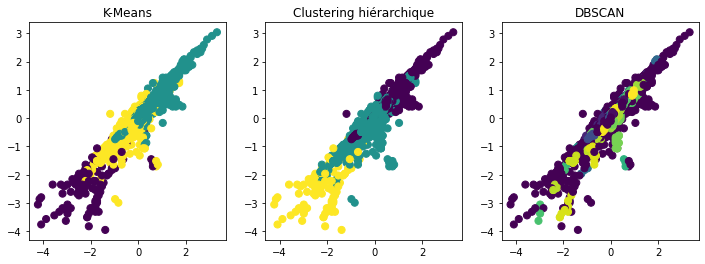

In [92]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_selected)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_selected)

dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_selected)
# Afficher les résultats
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].scatter(X_selected[:, 0], X_selected[:, 1], c=kmeans_labels, s=50)
axes[0].set_title("K-Means")
axes[1].scatter(X_selected[:, 0], X_selected[:, 1], c=hierarchical_labels, s=50)
axes[1].set_title("Clustering hiérarchique")
axes[2].scatter(X_selected[:, 0], X_selected[:, 1], c=dbscan_labels, s=50)
axes[2].set_title("DBSCAN")
plt.show()

###### 1.2 Without:

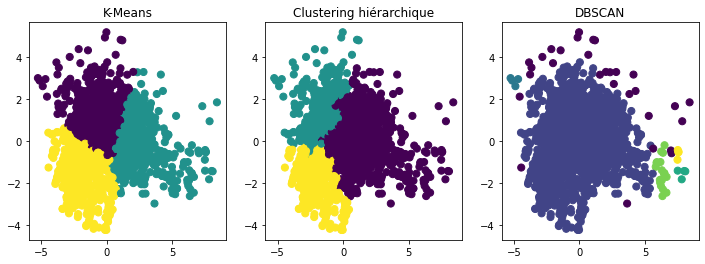

In [93]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X_pca)

dbscan = DBSCAN(eps=0.5, min_samples=4)
dbscan_labels = dbscan.fit_predict(X_pca)
# Afficher les résultats
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, s=50)
axes[0].set_title("K-Means")
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, s=50)
axes[1].set_title("Clustering hiérarchique")
axes[2].scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, s=50)
axes[2].set_title("DBSCAN")
plt.show()

## IV.Interprétation des résultats :
    Après avoir évalué les performances du modèle, on va interpréter les résultats et proposer des améliorations pour améliorer les performances.
    -----------------------------------------------------------------------------------------------------------------------
